In [6]:
import pandas as pd
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from scripts import project_functions_Levi

df = project_functions_Levi.load_and_process('../../data/raw/mlb_elo.csv')



In [23]:
#all world series games in sorted by winning teams pitcher1 from worst to best

df = project_functions_Levi.load_and_process('../../data/raw/mlb_elo.csv')
df3 = df[(df["playoff"] == "w") ]
df4 = df3.drop(["neutral", "home_prob", "away_prob", "home_post", "away_post", "home_pre", "away_pre"], axis="columns")
df4 = df4[(df4["home_pitcher_rating"] != "s") ]


# subtract away score from home score to find winner if positive home = winner
# subtrract away pitcher2_adj from pitcher1_adj to find better pitcher

score = df4["home_score"] - df4["away_score"]

df4["compare_score"] = score

#need to drop home_pitcher_rating & away_pitcher_rating with "s"

df4 = df4[(df4["home_pitcher_rating"] != "s") ]
comp_pitcher = df4["home_pitcher_rating"] - df4["away_pitcher_rating"]

df4["compare_pitchers"] = comp_pitcher

df4["home_win"] = np.where(df4["compare_score"] > 0, True, False)
df4["away_win"] = np.where(df4["compare_score"] < 0, True, False)

win_pitch = np.where(df4["home_win"] == True, (df4["home_pitcher_rating"]), (df4["away_pitcher_rating"]))
df4["win_pitch_adj"] = win_pitch

#make function to compare winner of game with differnce in pitcher ratings
df4["pitcher_difference"] = np.where(df4["home_win"] == True, (df4["compare_pitchers"]), (df4["compare_pitchers"] * -1))

# Find mean of winning pitcher
win_pitch_mean = df4["win_pitch_adj"].mean()
win_pitch_std = df4["win_pitch_adj"].std()




print(win_pitch_std)

# sort win_difference by smallest to largest

print(df4)


7.555717520725439
              date  season playoff home_team away_team    home_pitcher  \
0       10/27/2020    2020       w       LAD       TBD   Tony Gonsolin   
1       10/25/2020    2020       w       TBD       LAD   Tyler Glasnow   
2       10/24/2020    2020       w       TBD       LAD  Ryan Yarbrough   
3       10/23/2020    2020       w       TBD       LAD  Charlie Morton   
4       10/21/2020    2020       w       LAD       TBD   Tony Gonsolin   
...            ...     ...     ...       ...       ...             ...   
185307  10/11/1913    1913       w       SFG       OAK        mathc102   
185308  10/10/1913    1913       w       OAK       SFG        bendc101   
185309   10/9/1913    1913       w       SFG       OAK        tesrj101   
185310   10/8/1913    1913       w       OAK       SFG        plane101   
185311   10/7/1913    1913       w       SFG       OAK        marqr102   

           away_pitcher home_pitcher_rating away_pitcher_rating  home_score  \
0           Bl

# Describing the dataset

- Who
- What
- Where
- When
- How
- Why

In [22]:
# df.describe(include='all')
df4.describe("win_pitch_adj")

TypeError: '<=' not supported between instances of 'int' and 'numpy.str_'

## First Things First

### Let's isolate the data to only include world series games

>When doing this the Home and away starting pitcher's adjustment to their team's rating before 1913 were not tracked so that data will removed

>we will narrow down the selected games using the above criteria with the following code

### This code is used earlier but just shown now

df3 = df[(df["playoff"] == "w") ]  
df4 = df4.drop(["neutral", "home_prob", "away_prob", "home_post", "away_post", "home_pre", "away_pre"], axis="columns")  
df4 = df4[(df4["home_pitcher_rating"] != "s") ] 

print(df4)



## Part 2

> Here we will show the average pitcher's adjustment to the team rating for those that won the game. A positive number means that the pitcher provides a boost to their team, while a negativ number indicates their team has to overcome some bad pitching to win


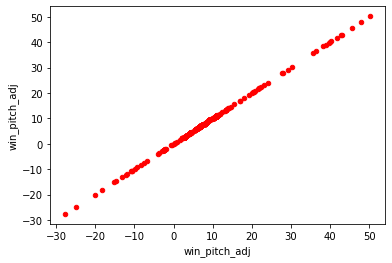

In [9]:
#plot the win_pitch_adj here data points here

df4.plot(kind='scatter',x="win_pitch_adj",y="win_pitch_adj",color='red')
plt.show()

>as you can see the majority of the teams to win have pitchers who have a positive impact on their team
>we are not interested in those pitchers, we want to find the worst adjusted pitcher rating to win a World series game. That dot is way in the bottom left
>next we will show the biggest difference bewteen the starting pitchers adjustment to their team and find which overcame the biggest gap to win

In [ ]:
labels = ["less than -50", "between -40 and -50", "between -30 and -40", "between -20 and -30", "between -10 and -5", "between -5 and 0", "between 0 and 5", "between 5 and 10", "between 10 and 20", "between 20 and 30", "between 30 and 40", "between 40 and 50", "greater than 50",]

# need to find way to count if pitcher is in value range




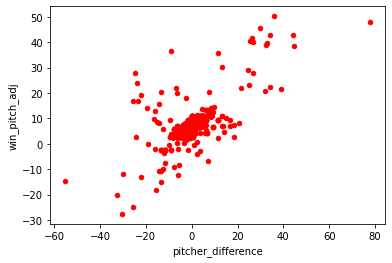

In [10]:
df4.plot(kind='scatter',x="pitcher_difference",y="win_pitch_adj",color='red')
plt.show()

## Now this is getting a little more intersting

as you can see the majority have an advantage in their pitchers adjustment to their team vs the opponents pitcher. The top right has teams with great pitching vs opponents whose pitching puts them at a disadvantage so it's no surprise that the majority of these are above 0 in pitcher difference.
Once again those guys are the norm and not that interesting, the more intersting cases are the ones furthest to bottom left. The furthest left is the biggesest penalty in adjusted pitcher ratings to win a World Series Game.

> Using the following code we can sort by that difference to find that game

In [18]:
df5 = df4.sort_values(by="pitcher_difference", ascending = True)
df5 = df5.drop(["compare_pitchers", "playoff"], axis="columns")


print(df5)

df5 = df4.sort_values(by="pitcher_difference", ascending = False)

# print(df5)


             date  season home_team away_team    home_pitcher  \
18211  10/24/2012    2012       SFG       DET      Barry Zito   
52676  10/21/1998    1998       SDP       NYY        browk001   
30524  10/28/2007    2007       COL       BOS        cooka002   
8353   10/28/2016    2016       CHC       CLE  Kyle Hendricks   
5882   10/31/2017    2017       LAD       HOU       Rich Hill   
...           ...     ...       ...       ...             ...   
3421   10/23/2018    2018       BOS       LAD      Chris Sale   
8351   10/30/2016    2016       CHC       CLE      Jon Lester   
25606   11/1/2009    2009       PHI       NYY     Joe Blanton   
8352   10/29/2016    2016       CHC       CLE     John Lackey   
953    10/27/2019    2019       WSN       HOU        Joe Ross   

           away_pitcher home_pitcher_rating away_pitcher_rating  home_score  \
18211  Justin Verlander             -14.777               40.35           8   
52676     Andy Pettitte              12.389             -20.1

# The largest negative differential in pitcher adjusted ratings to win a World Series Game 
### Barry Zito (SFG) vs Justin Verlander (DET)

Barry Zito came into this game with an adjusted pitcher rating of -14.777 while Justin Verlander who was one of the best pitchers of his generation entered the game with a rating of 40.35. Verlander was the better pitcher while Zito probably shouldn't have been pitching this game. Despite the odds Zito came away with a 5 run victory winning the game 8-3.

## The 2nd largest differential that was overcome
### Kevin Brown (SDP) vs Andy Pettitte (NYY)
The San Diego Padre's Kevin Brown was an above average strter while Andy Pettitte with an adjusted rating of 12.389 was most often in over his head and gave his to an adjusted rating of -20.116. The Padres failed to capitilize on the pitching at all getting shutout 3-0.


## The biggest positive differential in pitcher adjusted ratings was won by cheaters! 
### Joe Ross (WSN) vs Gerrit Cole (HOU)

The 2019 Houston Astros used cameras to steal signs and signal the Astro's pitcher for when a change-up would be pitched, a change-up is often considered easy to hit as they are much slower giving the batter more time to line up the ball. So while they do go down in the record books as having overcome the biggeset difference in pitcher adjusted ratings to their team, there is a **HUGE** asteriks on that game. The Houston Astros pitcher for this game.  

That being said their pitcher Gerrit Cole is a fantistic pitcher and had an adjusted pitcher rating of 47.888, while his opponent Joe Ross was not an amzing pitcher having an adusted pitcher rating of -29.811 and going up against a team of cheaters probably did not help his cause. This game wasn't close as the Astros were able to put up 2 runs in the 2nd inning and another 2 in the 4th inning sealing the game as the Nationals were not able to get any offense going against the dominant Cole.

![Astros](images/Astros.png)
## The 2nd biggest postivive difference in adjusted pitcher ratings 

This game came quite rcently as well, when the Chicago White Sox won a game 7 - 2 with a a difference of pitcher adjusted ratings of 44.58, this falls well short of the cheating Astros who had a pitcher difference of 77.699.
